In [1]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



In [11]:
df = cudf.read_parquet('../data/OA_Input_london.parquet')

In [12]:
df = df.drop(columns=['utla22cd', 'utla22nm'])

In [5]:
#cols_to_delete = ['v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59']
#df = df.drop(columns=cols_to_delete)

In [13]:
df

,OA,v01,v42,v02,v07,v08,v09,v10,v11,v12,...,v03,v04,v05,v06,v26,v28,v29,v36,v37,v60
0,E00000001,0.612157,0.694927,0.124698,0.224375,0.827406,0.690252,0.359882,0.000000,0.000000,...,0.634429,0.702044,0.863821,0.849305,0.708177,0.846782,0.648093,0.997981,0.949680,0.795447
1,E00000003,0.687681,0.740677,0.477074,0.364627,0.857145,0.527433,0.322629,0.388720,0.000000,...,0.688809,0.731522,0.828597,0.788738,0.473185,0.767775,0.730391,0.977987,0.962506,0.747044
2,E00000005,0.548163,0.741167,0.461645,0.312469,0.818677,0.643070,0.275236,0.304113,0.000000,...,0.318500,0.761153,0.889505,0.760475,0.694200,0.836961,0.605522,0.996980,0.914272,0.736681
3,E00000007,0.379239,0.710236,0.147359,0.399190,0.602640,0.804124,0.511586,0.475828,0.000000,...,0.406895,0.899855,0.768871,0.568480,0.459659,0.897328,0.382954,0.988696,0.792688,0.607384
4,E00000010,0.701625,0.842309,0.123423,0.123260,0.730991,0.747284,0.448638,0.495708,0.104297,...,0.453535,0.871473,0.861472,0.614466,0.500782,0.672472,0.404263,0.993862,0.694849,0.713251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26364,E00190465,0.576391,0.634216,0.485760,0.000000,0.172307,0.766383,0.530070,0.585683,0.210052,...,0.259569,0.887895,0.707667,0.379926,0.474732,0.733836,0.523073,0.998943,0.707593,0.759573
26365,E00190466,0.609291,0.823367,0.534290,0.253114,0.525757,0.581676,0.577434,0.749824,0.144155,...,0.810966,0.793081,0.832110,0.496902,0.638559,0.654038,0.845191,0.998440,0.754834,0.820407
26366,E00190467,0.560257,0.723968,0.607682,0.056122,0.391503,0.653335,0.685992,0.707895,0.198196,...,0.724385,0.854272,0.745589,0.443322,0.630409,0.712533,0.718100,0.999099,0.764051,0.787410
26367,E00190468,0.509366,0.722493,0.472791,0.422692,0.624163,0.650050,0.346680,0.517045,0.000000,...,0.720474,0.761228,0.861169,0.684115,0.667857,0.761276,0.714928,0.935205,0.907960,0.813655


In [14]:
df = df.set_index('OA')

In [15]:
cgram = Clustergram(range(1, 15), backend='cuML',n_init=100)

In [20]:
cgram.fit(df)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 12.460391521453857 seconds.
K=3 fitted in 21.886759281158447 seconds.
K=4 fitted in 16.010802030563354 seconds.
K=5 fitted in 13.840065240859985 seconds.
K=6 fitted in 20.695215702056885 seconds.
K=7 fitted in 23.930567264556885 seconds.
K=8 fitted in 27.984267234802246 seconds.
K=9 fitted in 29.44174885749817 seconds.
K=10 fitted in 35.391144037246704 seconds.
K=11 fitted in 33.768805503845215 seconds.
K=12 fitted in 34.892531394958496 seconds.
K=13 fitted in 38.107712745666504 seconds.
K=14 fitted in 44.57622218132019 seconds.


In [18]:
#cgram = Clustergram(range(1, 15), backend='sklearn',n_init=1000)

In [17]:
#df2= df.to_pandas()

In [16]:
#df2

In [19]:
#cgram.fit(df2)

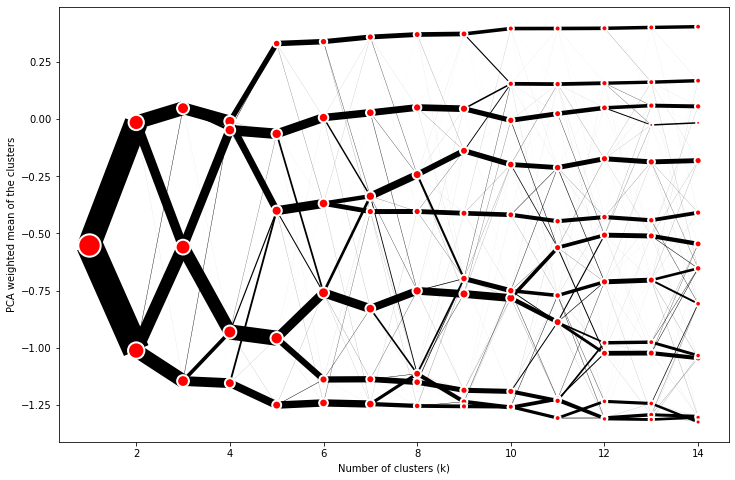

In [21]:
cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram.pdf')

In [8]:
with open('../data/clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)